<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-description:" data-toc-modified-id="Project-description:-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Project description:</a></span></li><li><span><a href="#Open-the-data-file-and-study-general-information." data-toc-modified-id="Open-the-data-file-and-study-general-information.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Open the data file and study general information.</a></span><ul class="toc-item"><li><span><a href="#Product-metrics." data-toc-modified-id="Product-metrics.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Product metrics.</a></span><ul class="toc-item"><li><span><a href="#DAU,-WAU,-MAU." data-toc-modified-id="DAU,-WAU,-MAU.-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>DAU, WAU, MAU.</a></span></li><li><span><a href="#How-many-times-a-day-do-users-visit-the-site-on-average?-Visualize-the-metrics'-changes." data-toc-modified-id="How-many-times-a-day-do-users-visit-the-site-on-average?-Visualize-the-metrics'-changes.-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>How many times a day do users visit the site on average? Visualize the metrics' changes.</a></span></li><li><span><a href="#Duration-of-an-average-user-session." data-toc-modified-id="Duration-of-an-average-user-session.-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Duration of an average user session.</a></span></li><li><span><a href="#Calculate-retention-rate-and-find-mean-retention-rate-for-the-2nd-month-of-cohort-lifetime." data-toc-modified-id="Calculate-retention-rate-and-find-mean-retention-rate-for-the-2nd-month-of-cohort-lifetime.-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Calculate retention rate and find mean retention rate for the 2nd month of cohort lifetime.</a></span></li></ul></li><li><span><a href="#Ecommerce-metrics." data-toc-modified-id="Ecommerce-metrics.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ecommerce metrics.</a></span><ul class="toc-item"><li><span><a href="#When-do-users-start-to-buy?" data-toc-modified-id="When-do-users-start-to-buy?-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>When do users start to buy?</a></span></li><li><span><a href="#Average-number-of-purchases-per-1-user-for-6-months." data-toc-modified-id="Average-number-of-purchases-per-1-user-for-6-months.-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Average number of purchases per 1 user for 6 months.</a></span></li><li><span><a href="#Average-check" data-toc-modified-id="Average-check-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Average check</a></span></li><li><span><a href="#LTV-calculation." data-toc-modified-id="LTV-calculation.-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>LTV calculation.</a></span></li></ul></li><li><span><a href="#Marketing-expenses." data-toc-modified-id="Marketing-expenses.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Marketing expenses.</a></span><ul class="toc-item"><li><span><a href="#Total-marketing-expenses.-Expense-allocation." data-toc-modified-id="Total-marketing-expenses.-Expense-allocation.-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Total marketing expenses. Expense allocation.</a></span></li><li><span><a href="#CAC" data-toc-modified-id="CAC-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>CAC</a></span></li><li><span><a href="#ROMI-by-cohorts-and-traffic-sources" data-toc-modified-id="ROMI-by-cohorts-and-traffic-sources-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>ROMI by cohorts and traffic sources</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion:" data-toc-modified-id="Conclusion:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Conclusion:</a></span></li></ul></div>

# Yandex.Afisha: business indicators analysis.

## Project description:

Yandex.Afisha is a ticket sales service based in Russia with operations in many cities across the country. 
Cinema, theaters, concerts, exhibitions - everyone can choose how to spend their time. Yandex.Afisha marketing department want to optimize marketing expenses. We are provided with the following data for the period June 2017 - May 2018 :
1. Server logs with information about site visits,
2. file woth all orders made in this period,
3. statistics on marketing expenses.

We need to answer the following questions:

How do the Clients use Yandex.afisha services?

When do they make first purchases on the site?

How much money does each Client bring to the company?

When are expenses recovered?

Revenue is measured in measured in conventional units - cu

## Open the data file and study general information.

Let's import the libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Now we can upload datasets.

In [2]:
visits = pd.read_csv('visits_log.csv')
orders = pd.read_csv('orders_log.csv')
costs = pd.read_csv('costs.csv')

Let's read first 5 lines of visits dataset:

In [3]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


We can check the dataset for Nan values

In [4]:
visits.isna().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

There are no Nan values.

It's time to study general information:

In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


End Ts and Start Ts columns contain data in 'object' format. It will be better to change the format to 'datetime'.

In [6]:
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])

Then we study dataset 'orders':

In [7]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Let's check it for Nan values:

In [8]:
orders.isna().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

and study general information:

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


We should change data format in 'Buy Ts' column:

In [10]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

Now it's turn to read and study dataframe 'costs':

In [11]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Let's check for Nan values:

In [12]:
costs.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

general information:

In [13]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


We change data format in 'dt' column to 'datetime':

In [14]:
costs['dt'] = pd.to_datetime(costs['dt'])

Then we rename columns and convert to a lowercase column names:

In [15]:
visits.columns = visits.columns.str.lower()
visits = visits.rename(columns={'start ts': 'session_start', 'end ts':'session_end', 'source id':'source_id'})
visits.head()

,device,session_end,source_id,session_start,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [16]:
orders = orders.rename(columns={'Buy Ts': 'order_date_time'})
orders.columns = orders.columns.str.lower()
orders.head()

,order_date_time,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


We rename 'dt' column to 'costs' 

In [17]:
costs = costs.rename(columns={'dt': 'company_start_date'})
costs.head()

,source_id,company_start_date,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Let's check all the datasets for duplicates:

In [18]:
visits.duplicated().sum()

0

In [19]:
orders.duplicated().sum()

0

In [20]:
costs.duplicated().sum()

0

There are no duplicates and now we can enrich our data.

dataframe 'visits': 
1. we add 'year', 'month', 'day' of the visit to our dataset
2. we add a column with the visit duration
3. Date and month of the first session
4. First session week and current session week

In [21]:
visits['session_start']=visits['session_start'].astype('datetime64')
visits['session_end']=visits['session_end'].astype('datetime64')
visits['session_year']  = visits['session_start'].dt.year
visits['session_week']  = visits['session_start'].dt.week
visits['session_date'] = visits['session_start'].dt.date
visits['session_duration'] = ((visits['session_end'] - visits['session_start']).dt.total_seconds() // 60).astype('int')
first_session_date = visits.groupby(['uid'])['session_start'].min()
first_session_date.name = 'first_session_start_date'
visits = visits.join(first_session_date,on='uid') 
visits['first_session_date'] = visits['first_session_start_date'].dt.date
visits['first_session_month'] = visits['first_session_date'].astype('datetime64[M]').dt.date
visits['current_session_month'] = visits['session_start'].astype('datetime64[M]').dt.date

visits['current_session_week'] = (pd.to_datetime(visits['session_date']) 
                            - pd.to_timedelta(pd.to_datetime(visits['session_date']).dt.dayofweek,'D'))
visits['first_session_week'] = (pd.to_datetime(visits['first_session_date'])
                            -pd.to_timedelta(pd.to_datetime(visits['first_session_date']).dt.dayofweek, 'D'))

visits.head()

,device,session_end,source_id,session_start,uid,session_year,session_week,session_date,session_duration,first_session_start_date,first_session_date,first_session_month,current_session_month,current_session_week,first_session_week
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,51,2017-12-20,18,2017-12-20 17:20:00,2017-12-20,2017-12-01,2017-12-01,2017-12-18,2017-12-18
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,8,2018-02-19,28,2018-02-19 16:53:00,2018-02-19,2018-02-01,2018-02-01,2018-02-19,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,2017-07-01,2017-06-26,2017-06-26
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,20,2018-05-20,24,2018-03-09 20:05:00,2018-03-09,2018-03-01,2018-05-01,2018-05-14,2018-03-05
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,52,2017-12-27,0,2017-12-27 14:06:00,2017-12-27,2017-12-01,2017-12-01,2017-12-25,2017-12-25


In this part of our analysis we imported the libraties, studied the data, check the datasets for Nan values and duplicates, change the data format where necessary and enriched the data.

### Product metrics.

#### DAU, WAU, MAU.

In this part of our project we will work with dataframe 'visits'. We use method describe() to learn more about the data:

In [22]:
visits.describe()

,source_id,uid,session_year,session_week,session_duration
count,359400.000000,3.594000e+05,359400.000000,359400.000000,359400.000000
mean,3.750515,9.202557e+18,2017.453395,26.970907,10.716327
std,1.917116,5.298433e+18,0.497824,16.773920,16.619289
min,1.000000,1.186350e+13,2017.000000,1.000000,-46.000000
25%,3.000000,4.613407e+18,2017.000000,11.000000,2.000000
50%,4.000000,9.227413e+18,2017.000000,26.000000,5.000000
75%,5.000000,1.372824e+19,2018.000000,43.000000,14.000000
max,10.000000,1.844668e+19,2018.000000,52.000000,711.000000


There are negative values in 'session_duration' column. It's not normal, let's count them:

In [23]:
weird_visits = visits.query('session_duration<0')
weird_visits

,device,session_end,source_id,session_start,uid,session_year,session_week,session_date,session_duration,first_session_start_date,first_session_date,first_session_month,current_session_month,current_session_week,first_session_week
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986,2018,12,2018-03-25,-33,2017-11-12 16:49:00,2017-11-12,2017-11-01,2018-03-01,2018-03-19,2017-11-06
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453,2018,12,2018-03-25,-46,2018-03-19 18:40:00,2018-03-19,2018-03-01,2018-03-01,2018-03-19,2018-03-19


There are only 2 negative values, we can eliminate them from the table:

In [24]:
visits = visits.query('session_duration>=0')

Now we can calculate MAU - number of unique users per month. For this purpose we group the data by year, month and count users.

In [25]:
mau = visits.groupby('current_session_month').agg({'uid': 'nunique'}).reset_index()
mau.head()

,current_session_month,uid
0,2017-06-01,13259
1,2017-07-01,14183
2,2017-08-01,11631
3,2017-09-01,18975
4,2017-10-01,29692


We use seaborn library to build a lineplot. Green line shows the mean number of unique users: 

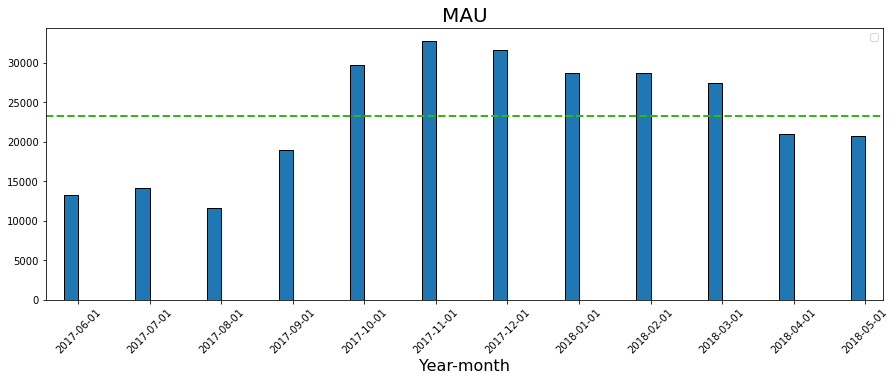

In [26]:
ax = plt.gca()
mau.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, position=1)
plt.axhline(y=mau['uid'].mean(), color='#35B815', linestyle='--', lw=2)
plt.title("MAU", fontsize = 20)
plt.xlabel('Year-month',fontsize=16)
ax.set_xticklabels(mau['current_session_month'], rotation=45)
ax.legend('')
plt.show()

In October, November and December Yandex.Afisha has peak values. People were buying tickets to different shows to have some fun on holidays.

WAU is a number of unique users per week. Let's group the dataframe by year and week, calculate the number of unique users.

In [27]:
wau = visits.groupby(['session_year','session_week']).agg({'uid': 'nunique'}).reset_index()
wau['week'] = wau['session_year'].astype(str) +'-' + wau['session_week'].astype(str)
wau.head()

,session_year,session_week,uid,week
0,2017,22,2021,2017-22
1,2017,23,4129,2017-23
2,2017,24,2812,2017-24
3,2017,25,2878,2017-25
4,2017,26,3064,2017-26


Again we use seaborn library for vusualization. Green line on the lineplot demonstrates the mean number of users.

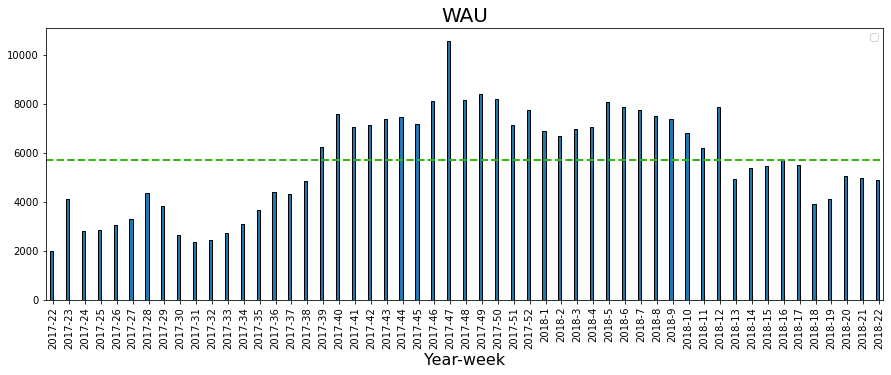

In [28]:
ax = plt.gca()
wau.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, position=1, y='uid', x='week')
plt.axhline(y=wau['uid'].mean(), color='#35B815', linestyle='--', lw=2)
ax.legend('WAU')
plt.title("WAU", fontsize = 20)
plt.xlabel('Year-week',fontsize=16)
ax.legend('')
plt.show()

47th week has the peak value. It's the end of November.

DAU is a number of unique users per day. We group our data by days and count the number of unique users for each day. We build a lineplot where the green line shows the mean number of unique users per day.  

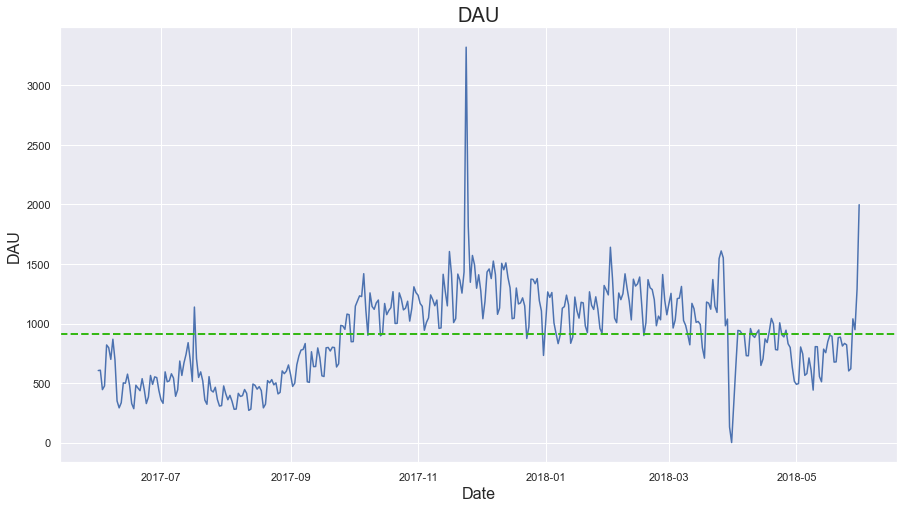

In [29]:
dau = visits.groupby('session_date').agg({'uid': 'nunique'}).reset_index()
sns.set(style='darkgrid',)
plt.figure(figsize=(15, 8))
sns.lineplot(x='session_date', y='uid', data=dau)
plt.axhline(y=dau['uid'].mean(), color='#35B815', linestyle='--', lw=2)
plt.title("DAU", fontsize = 20)
plt.xlabel('Date',fontsize=16)
plt.ylabel('DAU',fontsize=16)
plt.show()

We can see that the mean daily number of unique users is 1000 people. There is a gradual increase in site visits since August and there is a peak at the end of November - beginning of December. People were making plans for winter holidays. From January till March the number of unique users fluctuates between 1000-1500 users per day. It's higher than in summer months. In summer people prefer outdoor activities or go to their country houses. There is a significant fall in the number of unique users in April. People spent a lot of money on New Year, Christmas, February 23d and March 8th gifts and entertainment.

Lets calculate DAU, WAU and MAU metrics  

In [30]:
mau_total = (
    visits.groupby('current_session_month')
    .agg({'uid': 'nunique'})
    .mean())
mau_total


uid    23228.416667
dtype: float64

In [31]:
dau_total = (
    visits.groupby('session_date')
    .agg({'uid': 'nunique'})
    .mean())
dau_total

uid    907.991758
dtype: float64

In [32]:
wau_total = (
    visits.groupby(['session_week'])
    .agg({'uid': 'nunique'})
    .mean())
wau_total

uid    5825.288462
dtype: float64

In this part of our analysis we found out that there are seasonal fluctuations. In summer Yandex.Afisha has fewer unique users than in winter. Peak values are reached in the 4th quarter of the year before winter holidays. MAU = 23228, WAU = 5825, DAU = 907 - mean number of unique users per month, week and year correspondingly. 

#### How many times a day do users visit the site on average? Visualize the metrics' changes.

There are 'session_date' and 'session_start' columns in 'visits' dataframe. Let's group the data by the date of the visit and user_id and count the average number of visits.

In [33]:
visit_per_day = visits.groupby('session_date')['uid'].count().reset_index()
visit_per_day.head()

,session_date,uid
0,2017-06-01,664
1,2017-06-02,658
2,2017-06-03,477
3,2017-06-04,510
4,2017-06-05,893


Now we calculate the average number of visits per day:

In [34]:
visit_per_day_mean = visit_per_day['uid'].mean()
visit_per_day_mean

987.3571428571429

Then we group the data by the date of the visit and user id, count the average number of visits per day within the period under consideration and the average number of visits per user for the whole period:

In [35]:
visit_per_day_per_user = visits.groupby(['session_date','uid'])['session_duration'].count().reset_index()
visit_per_day_per_user.head()

,session_date,uid,session_duration
0,2017-06-01,32197920403662046,1
1,2017-06-01,184148767273119549,2
2,2017-06-01,254239507810036143,1
3,2017-06-01,258099436367309303,1
4,2017-06-01,300776506671194537,1


Let's find the average number of visits per day per user in the period under consideration. 

In [36]:
visit_per_day_per_user_mean_period = visit_per_day_per_user.groupby('session_date')['session_duration'].mean().reset_index()
visit_per_day_per_user_mean_period

,session_date,session_duration
0,2017-06-01,1.097521
1,2017-06-02,1.082237
2,2017-06-03,1.071910
3,2017-06-04,1.071429
4,2017-06-05,1.089024
...,...,...
359,2018-05-27,1.083871
360,2018-05-28,1.112608
361,2018-05-29,1.091772
362,2018-05-30,1.093871


In [37]:
visit_per_day_per_user_mean = visit_per_day_per_user['session_duration'].mean()
visit_per_day_per_user_mean

1.0874076046340644

The average number of visits per day: 987, 1 visit per user.

Now we can visualize the result:

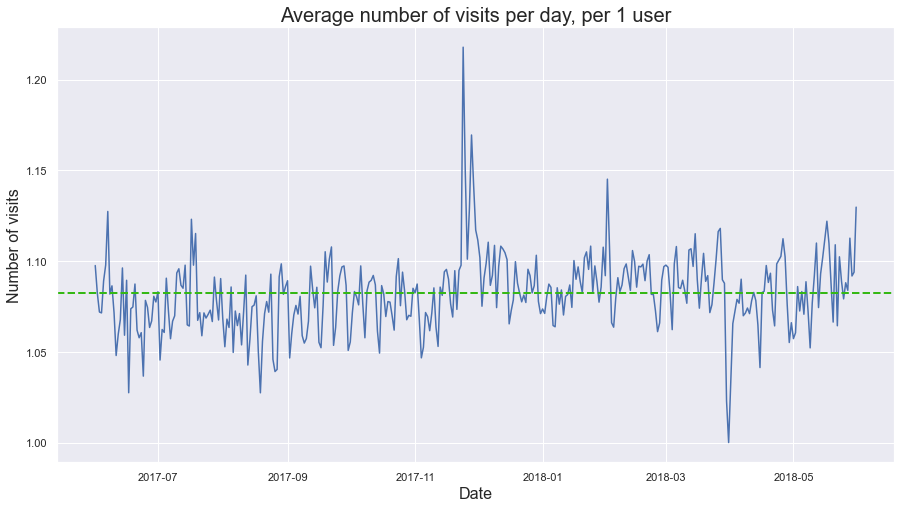

In [38]:
sns.set(style='darkgrid',)
plt.figure(figsize=(15, 8))
sns.lineplot(x='session_date', y='session_duration', data=visit_per_day_per_user_mean_period)
plt.axhline(y=visit_per_day_per_user_mean_period['session_duration'].mean(), color='#35B815', linestyle='--', lw=2)
plt.title('Average number of visits per day, per 1 user', fontsize = 20)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Number of visits',fontsize=16)
plt.show()


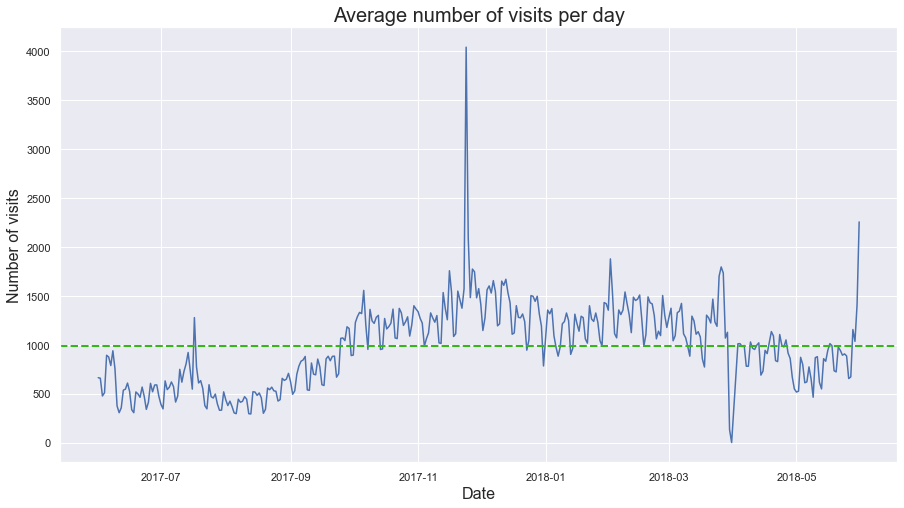

In [39]:
sns.set(style='darkgrid',)
plt.figure(figsize=(15, 8))
sns.lineplot(x='session_date', y='uid', data=visit_per_day)
plt.axhline(y=visit_per_day_mean, color='#35B815', linestyle='--', lw=2)
plt.title('Average number of visits per day', fontsize = 20)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Number of visits',fontsize=16)
plt.show()

Again we see peak values in November-December and the lowest value in April.

#### Duration of an average user session.

We use method describe() to study the data from 'session_duration' column :

In [40]:
visits['session_duration'].describe()

count    359398.000000
mean         10.716607
std          16.618906
min           0.000000
25%           2.000000
50%           5.000000
75%          14.000000
max         711.000000
Name: session_duration, dtype: float64

The duration varies from 0 to 711 minutes. The mean value is 10.71 minutes.

Let's build a boxplot for this column:

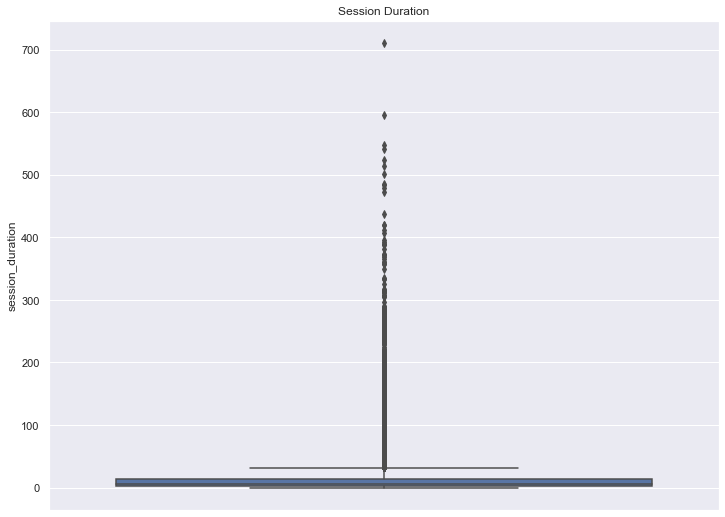

In [41]:
plt.figure(figsize=(12, 9))
sns.boxplot(y='session_duration', data = visits)
plt.title('Session Duration')
plt.show()

Let's remove outliers and build a histogram. Outliers are unusual values in the dataset, outliers affect variance, and standard deviation of a data distribution. In a data distribution, with extreme outliers, the distribution is skewed in the direction of the outliers which makes it difficult to analyze the data.

In [42]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] >= fence_low) & (df_in[col_name] <= fence_high)]
    return df_out

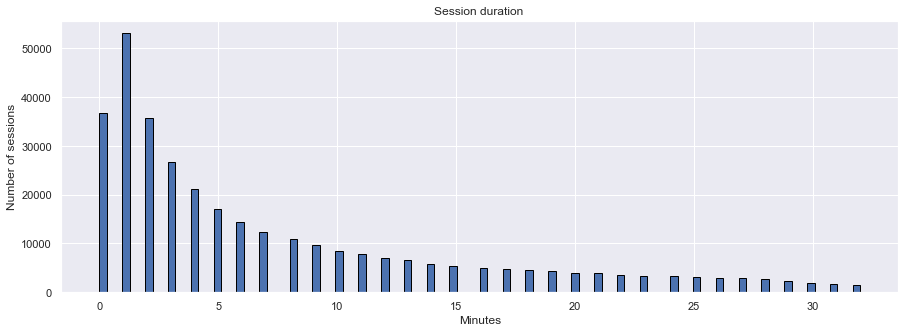

In [43]:
session_duration = remove_outlier(visits, 'session_duration')
_= session_duration['session_duration'].hist(bins=100, figsize=(15,5), ec='black') # проиллюстрируем также гистограммой
plt.title('Session duration ')
plt.ylabel('Number of sessions')
plt.xlabel('Minutes')
plt.show() 

The distribution is skewed to the right. That's why we use mode as a measure of central tendency here. Most users spend 1 minute on the site:

In [44]:
session_duration['session_duration'].mode()[0]

1

#### Calculate retention rate and find mean retention rate for the 2nd month of cohort lifetime.

To calculate retention rate we need 'cohort_lifetime' column. Then we create 'cohorts' table and calculate the number of unique users.

In [45]:
visits['cohort_lifetime'] = (
    visits['current_session_month'] - visits['first_session_month']
)
visits['cohort_lifetime'] = visits[
    'cohort_lifetime'
] / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype(
    'int'
) 
cohorts = visits.groupby(['first_session_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts.head()

,first_session_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


In the next step we create 'initial_users_count' table.

In [46]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][
    ['first_session_month', 'uid']
]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 
initial_users_count.head()

,first_session_month,cohort_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977


Now we can merge 'cohorts' and 'initial_users_count' tables on 'first_session_month' column. Then we add 'retention' column. To calculate retention we divide data from 'uid' column by 'cohort_users' column. 'Retention' shows the percentage of users who continue visiting the site over a given time period. 

In [47]:
cohorts = cohorts.merge(initial_users_count,on='first_session_month') 
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users'] 
cohorts.head()

,first_session_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557


We need to find retention rate for the 2nd month. Let's use query() method where cohort_lifetime==1:

In [48]:
retention_month_two = cohorts.query('cohort_lifetime==1') # counting in pandas starts with 0
retention_month_two

,first_session_month,cohort_lifetime,uid,cohort_users,retention
1,2017-06-01,1,1043,13259,0.078664
13,2017-07-01,1,737,13140,0.056088
24,2017-08-01,1,783,10181,0.076908
34,2017-09-01,1,1428,16704,0.085489
43,2017-10-01,1,2042,25977,0.078608
51,2017-11-01,1,2133,27248,0.078281
58,2017-12-01,1,1410,25268,0.055802
64,2018-01-01,1,1351,22624,0.059715
69,2018-02-01,1,1267,22197,0.057080
73,2018-03-01,1,861,20589,0.041818


Then we calculate the mean value for the second month for all cohorts:

In [49]:
retention_month_two['retention'].mean()


0.06516659710392834

To visualize our calculations we use a heatmap. Values in the cells - average number of users who continued to visit the site. Y axis - first session month, x axis - cohort lifetime.

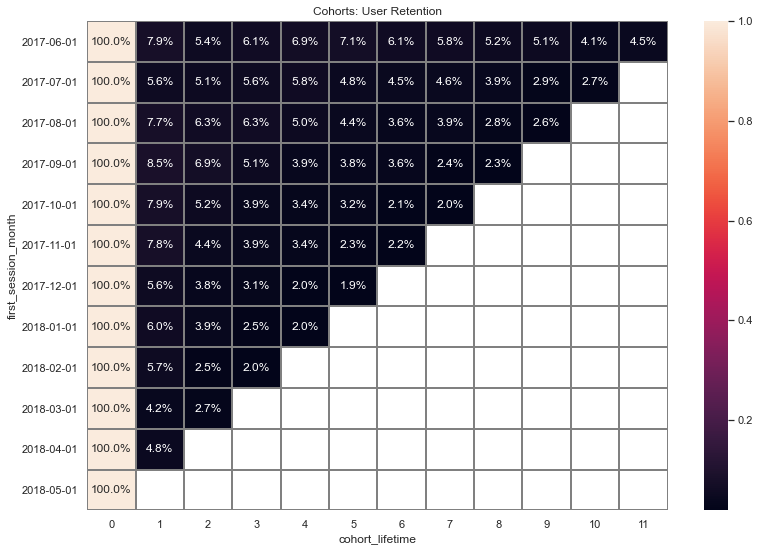

In [50]:
retention_pivot = cohorts.pivot_table(
    index='first_session_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='mean',
) 
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray'); 

Retention rate for the second month was 0.065. Only 6% of users returned. The 'older' the cohort gets, the less users returned. If we compare cohorts, cohort 1 had the best result. 

### Ecommerce metrics.

#### When do users start to buy?

To answer this question we create first_purchase_date table. We group 'orders' dataset by users and first order date. We also create 'first_session_date' table: here we group 'visits' dataframe by user and first session: 

In [51]:
first_purchase_date = orders.groupby('uid')['order_date_time'].min().reset_index()
first_purchase_date.columns = ['uid', 'first_purchase_date']
first_session_date = visits.groupby('uid')['session_start'].min().reset_index()
first_session_date.columns = ['uid', 'first_session']
first_purchase_date.head()

,uid,first_purchase_date
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


In [52]:
first_session_date.head()

,uid,first_session
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


Then we merge 'first_session_date' and 'first_purchase_date' tables and create 'visit_to_purchase' table.  

In [53]:
visit_to_purchase = first_session_date.merge(first_purchase_date, on='uid', how='inner')
visit_to_purchase.head()

,uid,first_session,first_purchase_date
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


Now we can find out how much time passes from first session to first purchase. We subtract "first_session_date" column from "first_purchase_date" columnх:

In [54]:
visit_to_purchase['visit_to_purchase'] = visit_to_purchase['first_purchase_date']-visit_to_purchase['first_session']
visit_to_purchase['visit_to_purchase'] = (visit_to_purchase['visit_to_purchase']/np.timedelta64(1, 'm')).astype(int)
visit_to_purchase.head()

,uid,first_session,first_purchase_date,visit_to_purchase
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,154022
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,79
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,1184
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0


We use method describe() to study 'visit_to_purchase' column: 

In [55]:
visit_to_purchase['visit_to_purchase'].describe()

count     36523.000000
mean      24340.175834
std       67784.774690
min           0.000000
25%           4.000000
50%          16.000000
75%        2897.000000
max      523144.000000
Name: visit_to_purchase, dtype: float64

The time period from first session to first purchase varies from 0 to 523144 minutes (363 days). To visualize it we build a bloxplot:

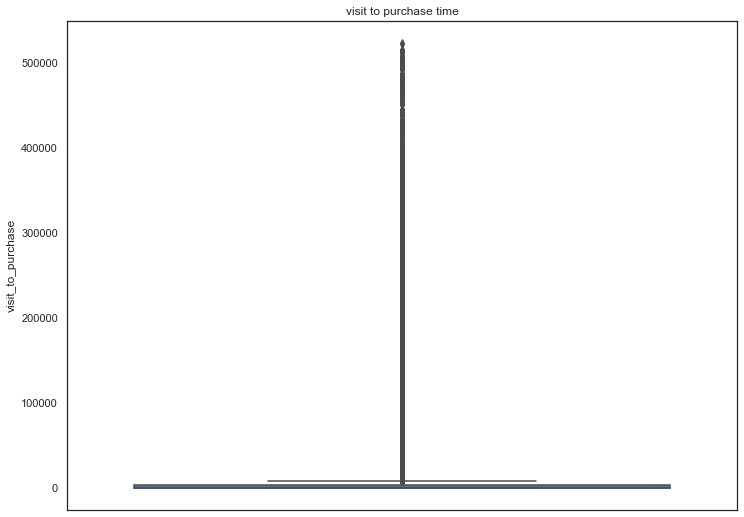

In [56]:
plt.figure(figsize=(12, 9))
sns.boxplot(y='visit_to_purchase', data = visit_to_purchase)
plt.title('visit to purchase time')
plt.show()

Let's remove the outliers.

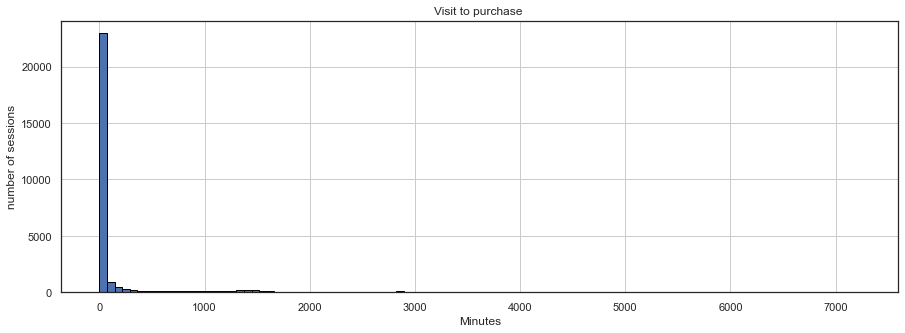

In [57]:
visit_to_purchase_new = remove_outlier(visit_to_purchase, 'visit_to_purchase')
_= visit_to_purchase_new['visit_to_purchase'].hist(bins=100, figsize=(15,5), ec='black') # проиллюстрируем также гистограммой
plt.title('Visit to purchase ')
plt.ylabel('number of sessions')
plt.xlabel('Minutes')
plt.show() 

In [58]:
visit_to_purchase['visit_to_purchase'].mode()

0    1
dtype: int32

#### Average number of purchases per 1 user for 6 months.

We find the month when the 1st order was placed and we merge 'orders' and 'first_purchase_date' datasets on 'uid' column. 

In [60]:
first_purchase_date['first_purchase_date'] = first_purchase_date['first_purchase_date'].astype('datetime64[M]')
orders = orders.merge(first_purchase_date, on='uid')
orders.head(10)

,order_date_time,revenue,uid,first_purchase_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01
5,2017-06-01 08:43:00,0.18,10402394430196413321,2017-06-01
6,2017-06-01 08:54:00,1.83,12464626743129688638,2017-06-01
7,2017-06-05 14:30:00,7.33,12464626743129688638,2017-06-01
8,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01
9,2017-06-02 12:44:00,0.85,3644482766749211722,2017-06-01


We add 'user_lifetime' column to 'orders' table with the number of months since the first order was made. Then we find the 'average_orders_number': we use method 'query' to limit the period under consideration to 6 months. Then we group the dataset by users and order date. We use methods 'count' and 'mean' to calculate the average number of orders per 1 user.  

In [61]:
orders['user_lifetime']=(orders['order_date_time']-orders['first_purchase_date'])/ np.timedelta64(1, 'M')
orders['user_lifetime'] = orders['user_lifetime'].astype('int') 
average_orders_number = (orders.query('user_lifetime<=5')
                        .groupby('uid')['order_date_time']
                        .count().mean())
average_orders_number

1.3256304246639103

Average number of orders per user was 1 order. Few Clients made second orders, most Clients did not return. Either users usually do not go to shows or concerts or they found other sites to purchase tickets.

#### Average check

We create 'average_check' table. 

In [62]:
orders['current_purchase_date'] = orders['order_date_time'].astype('datetime64[M]').dt.date
average_check = orders.groupby('current_purchase_date')['revenue'].mean().reset_index()
average_check.head()

,current_purchase_date,revenue
0,2017-06-01,4.060106
1,2017-07-01,5.306589
2,2017-08-01,4.847139
3,2017-09-01,5.416448
4,2017-10-01,4.928280


Now we can find the average check for the entire period. 

In [63]:
average_check_for_period = orders['revenue'].mean()
average_check_for_period

4.999646930476922

In [64]:
average_check.describe()

,revenue
count,13.000000
mean,4.838700
std,0.656336
min,3.420000
25%,4.771279
50%,4.847139
75%,5.306589
max,5.852139


Let's use seaborn library to build a lineplot. 

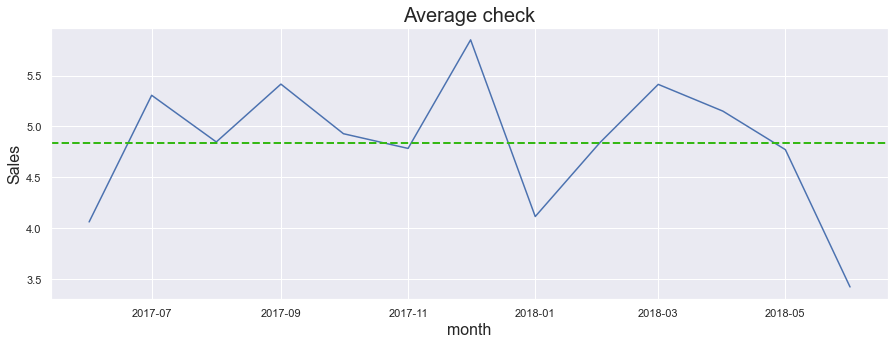

In [65]:
sns.set(style='darkgrid',)
plt.figure(figsize=(15, 5))
sns.lineplot(x='current_purchase_date', y='revenue', data=average_check)
plt.axhline(y=average_check['revenue'].mean(), color='#35B815', linestyle='--', lw=2)
plt.title("Average check", fontsize = 20)
plt.xlabel('month',fontsize=16)
plt.ylabel('Sales',fontsize=16)
plt.show()

This lineplot has peak value in December 2017 when people are getting ready for New Year and Christmas. Minimum values can be found in June when most people spend their free time outdoors.

#### LTV calculation.

Let's have a look at 'orders' dataset:

In [66]:
orders.head()

,order_date_time,revenue,uid,first_purchase_date,user_lifetime,current_purchase_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,0,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,0,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,0,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,0,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,0,2017-06-01


In [67]:
orders.describe()

,revenue,uid,user_lifetime
count,50415.000000,5.041500e+04,50415.000000
mean,4.999647,9.098161e+18,0.643618
std,21.818359,5.285742e+18,1.718033
min,0.000000,3.135781e+14,0.000000
25%,1.220000,4.533567e+18,0.000000
50%,2.500000,9.102274e+18,0.000000
75%,4.890000,1.368290e+19,0.000000
max,2633.280000,1.844617e+19,11.000000


We will use 'order_date_time' column for the month when the order was made. Let's create 'cohorts' table: we will group 'orders' dataframe by 'first_purchase_date' and 'order_date_time' then sum the revenue

In [68]:
orders['order_date_time']=orders['order_date_time'].astype('datetime64[M]') 
cohorts = (
    orders.groupby(['first_purchase_date', 'order_date_time'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
#cohorts.columns = ['first_order_date', 'order_date', 'n_buyers', 'revenue']
cohorts.head()

,first_purchase_date,order_date_time,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


Now we can find the number of unique users in the cohort: we group 'first_purchase_date' table by 'first_purchase_date' column and calculate the number of unique users.   

In [69]:
cohort_sizes = (
    first_purchase_date.groupby('first_purchase_date')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_purchase_date', 'n_buyers']
cohort_sizes
#first_purchase_date.head()

,first_purchase_date,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


We create 'report' table by merging 'cohort_sizes' and 'cohorts' dataframes on 'first_purchase_date' column. 

In [70]:
report = pd.merge(cohort_sizes, cohorts, on='first_purchase_date')
report.head() 

,first_purchase_date,n_buyers,order_date_time,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


We know that the margin is 100%. Let's add 'gp' (gross profit) column and 'lifetime period' column to 'report' table.  

In [71]:
margin_rate = 1

report['gp'] = report['revenue'] * margin_rate
report['lifetime_period'] = (
    report['order_date_time'] - report['first_purchase_date']
) / np.timedelta64(1, 'M')
report['lifetime_period'] = report['lifetime_period'].round().astype('int')
report.head()

,first_purchase_date,n_buyers,order_date_time,revenue,gp,lifetime_period
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4


To calculate LTV we divide gross profit by number of customers. Then we use method 'pivot' to group the table: 'first_purchase date' will be rows and 'age' (cohort age) will be columns. Values in the cells are cumulative mean values.    

In [72]:
report['ltv'] = report['gp'] / report['n_buyers']
report['first_purchase_date'] = report['first_purchase_date'].dt.date
output = report.pivot_table(
    index='first_purchase_date', columns='lifetime_period', values='ltv', aggfunc='mean'
).round(2)

#output = output.fillna(0)
ltv=output.cumsum(axis=1)
ltv = ltv.fillna('')
ltv

lifetime_period,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_date,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.4,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.37,7.58,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.07,6.22,6.27,6.38,,,,,
2017-12-01,4.74,5.0,5.93,7.0,7.31,7.65,,,,,,
2018-01-01,4.14,4.43,4.73,4.87,4.93,,,,,,,
2018-02-01,4.16,4.44,4.52,4.59,,,,,,,,


Let's calculate mean LTV for 6 months for all cohorts with lifetime not less than 6 months:

In [73]:
ltv_6month_mean = ltv[ltv[5]!=''][5].mean()
ltv_6month_mean

7.970000000000001

Then we build heatmap to show cumulative monthly ltv for each cohort.

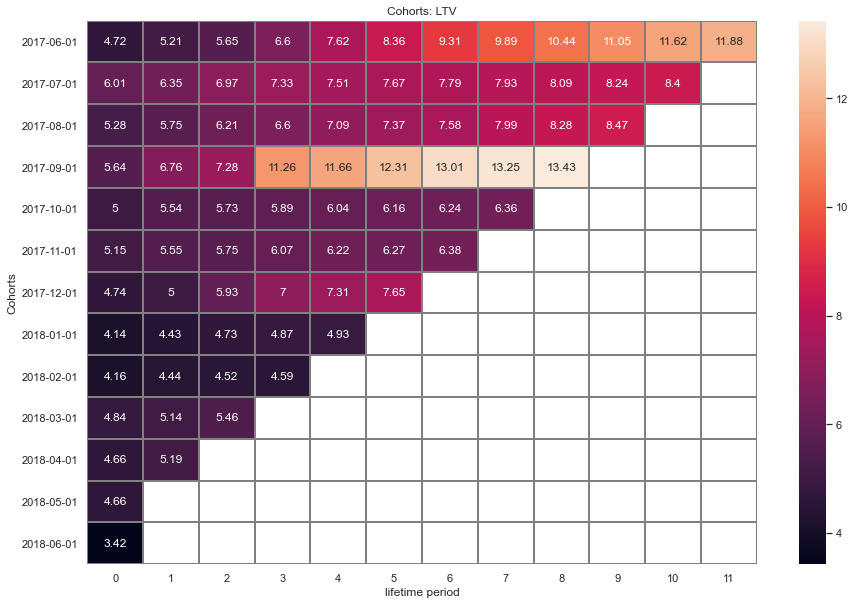

In [74]:
sns.set(style='white')
plt.figure(figsize=(15, 10))
plt.title('Cohorts: LTV')
ltv=output.cumsum(axis=1).round(2)
ax = sns.heatmap(ltv, annot=True, fmt='g', linewidths=1, linecolor='gray')
ax.set_xlabel('lifetime period')
ax.set_ylabel('Cohorts')
plt.show()

Mean LTV was 8 cu. September and June cohorts were most successful. However it makes sense to calculate ROMI before making conclusions. 

### Marketing expenses.

#### Total marketing expenses. Expense allocation.

The sum of total marketing expenses (conventional units): 

In [75]:
costs_total = costs['costs'].sum()
costs_total

329131.62

To learn the teaffic sources we can use method unique()

In [76]:
costs['source_id'].unique()

array([ 1,  2,  3,  4,  5,  9, 10], dtype=int64)

Let's create 'costs_by_source' table. we'll group expenses by traffic source and calculate the sum. We also add a column showing what per cent each source of traffic constitutes in the total amount of marketing expenses. 

In [77]:
costs_by_source = costs.groupby('source_id')['costs'].sum().reset_index()
costs_by_source['per_cent']=(costs_by_source['costs']/costs_total*100).round().astype('int')
costs_by_source

,source_id,costs,per_cent
0,1,20833.27,6
1,2,42806.04,13
2,3,141321.63,43
3,4,61073.60,19
4,5,51757.10,16
5,9,5517.49,2
6,10,5822.49,2


It will be useful to make an expenses beakdown by months.

In [78]:
costs['month'] = costs['company_start_date'].astype('datetime64[M]').dt.date
costs.head()

,source_id,company_start_date,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


We can also make monthly expenses tables for each traffic source. 

In [79]:
costs_by_month = pd.pivot_table(costs, index='month', columns='source_id', values='costs', margins=False, aggfunc='sum')
costs_by_month

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


Let's visualize monthly expenses for each traffic source:

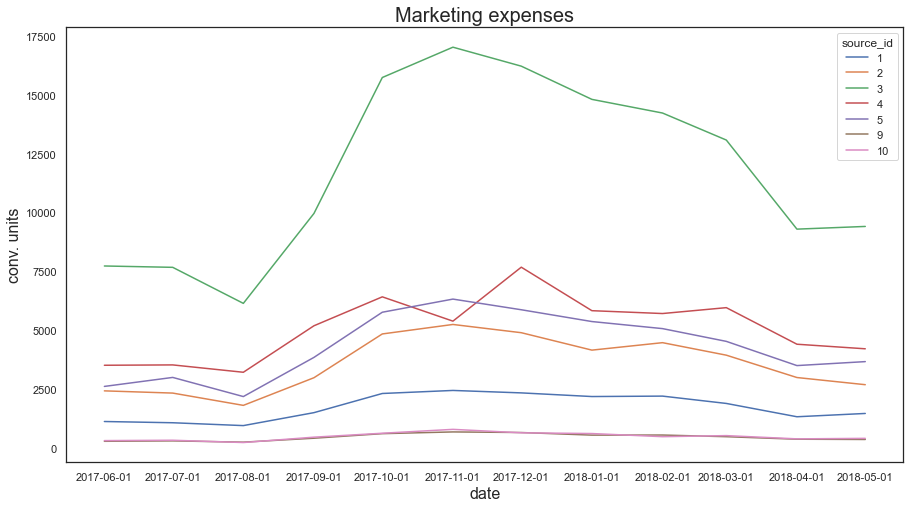

In [80]:
fig, ax = plt.subplots()
costs_by_month.plot(xticks=costs_by_month.index, ax=ax, figsize=(15, 8))
ax.set_title("Marketing expenses", fontsize = 20)
ax.set_xlabel('date',fontsize=16)
ax.set_ylabel('conv. units',fontsize=16)
plt.show()

Yandex.Afisha spent more money on traffic source #3 than on any other traffic sources. The least amount of money was spent on traffic source #10. There is a sharp increase in marketing expenses (source#3) in September-November 2017. In January marketing expenses declined. 

Now let's have a look at total monthly marketing expenses.

In [81]:
costs_month = costs.groupby('month')['costs'].sum().reset_index()
costs_month

,month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


and build a bar chart:

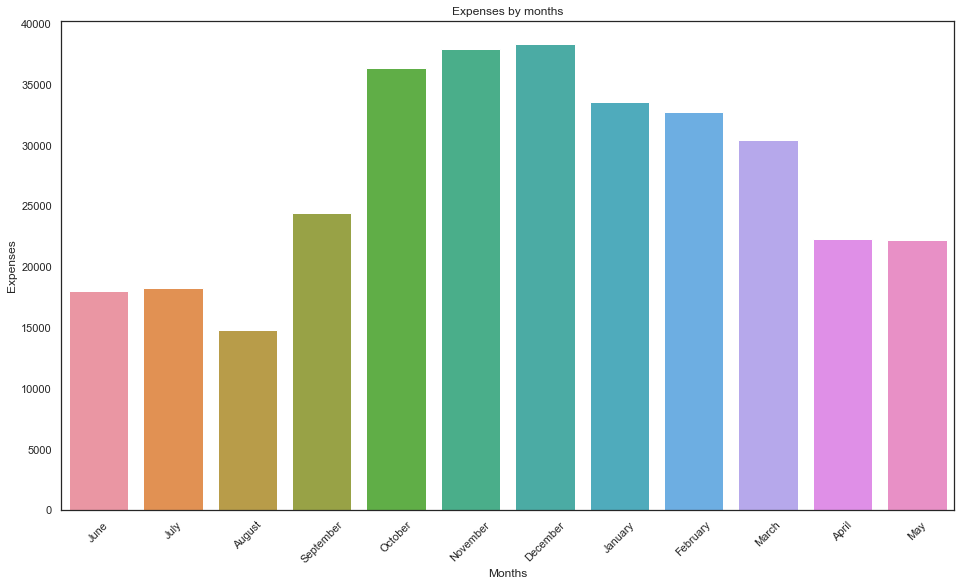

In [82]:
month_lst = ['June', 'July', 'August', 'September', 'October', 'November', \
             'December', 'January', 'February', 'March', 'April', 'May']
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="month", y="costs", data=costs_month)
ax.set_xticklabels(month_lst, rotation=45)
plt.title('Expenses by months')
ax.set_xlabel('Months')
ax.set_ylabel('Expenses')
plt.show()

Total marketing expenes for 7 traffic sources for the period amounted to 329131 conventional units. This beakdown by months also demonstrates a sharp increase in marketing expenses in the last quarter of the year. A gradual decrease in marketing expenses in January-May tells us the company did not want to spend more on marketing (clients ran out of money and it did not make any sense to invest in marketing at that time).

#### CAC 

We create 'report_new' table for CAC calculation. We merge 'report', 'costs_month' dataframes on the column 'first_purchase_date'. Then we add CAC column and divide costs by the number of buyers.

In [83]:
report_new = pd.merge(
    report, costs_month, left_on='first_purchase_date', right_on='month'
)
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new.head(20) 

,first_purchase_date,n_buyers,order_date_time,revenue,gp,lifetime_period,ltv,month,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,2017-06-01,18015.00,8.905091
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329,2017-06-01,18015.00,8.905091
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637,2017-06-01,18015.00,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671,2017-06-01,18015.00,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531,2017-06-01,18015.00,8.905091
5,2017-06-01,2023,2017-11-01,1487.92,1487.92,5,0.735502,2017-06-01,18015.00,8.905091
6,2017-06-01,2023,2017-12-01,1922.74,1922.74,6,0.950440,2017-06-01,18015.00,8.905091
7,2017-06-01,2023,2018-01-01,1176.56,1176.56,7,0.581592,2017-06-01,18015.00,8.905091
8,2017-06-01,2023,2018-02-01,1119.15,1119.15,8,0.553213,2017-06-01,18015.00,8.905091
9,2017-06-01,2023,2018-03-01,1225.51,1225.51,9,0.605788,2017-06-01,18015.00,8.905091


Now we create 'visits_source' table. We use method 'query' to filter the dataset by first session start date. Then we merge 'orders', 'visits_source' datasets, group the data by traffic source and calculate revenue. Then we need to calculate costs by traffic source. At the end create 'CAC' table and substitute NAN values with nulls. To calculate CAC we divide Expenses by the number of Clients.

In [84]:
visits_source = visits.query('first_session_start_date == session_start')
customers_by_source = (orders.merge(visits_source, on='uid', how='inner')
                         .groupby('source_id').agg({'uid':'nunique', 'revenue':'sum'})
                         .rename(columns={'uid':'customers'})).reset_index()
costs_source = costs.groupby('source_id')['costs'].sum().reset_index()
cac = customers_by_source.merge(costs_by_source, on='source_id', how='left').reset_index()
cac = cac.fillna(0)
cac['cac'] = cac['costs'] / cac['customers']
cac.sort_values('cac', ascending = False)

,index,source_id,customers,revenue,costs,per_cent,cac
2,2,3,10473,54511.24,141321.63,43.0,13.493901
1,1,2,3506,46923.61,42806.04,13.0,12.209367
4,4,5,6931,52624.02,51757.10,16.0,7.467479
0,0,1,2899,31090.55,20833.27,6.0,7.186364
3,3,4,10296,56696.83,61073.60,19.0,5.931779
6,6,9,1088,5759.40,5517.49,2.0,5.071222
7,7,10,1329,4450.33,5822.49,2.0,4.381106
5,5,7,1,1.22,0.00,0.0,0.000000


In [85]:
cac_total = cac['costs'].sum()/cac['customers'].sum()
cac_total


9.011626098622784

In [86]:
cac_total = cac['costs'].sum()/orders['uid'].nunique()
cac_total

9.011626098622784

Cac per user is 9.01 conventional units.

Let's visualize the results.

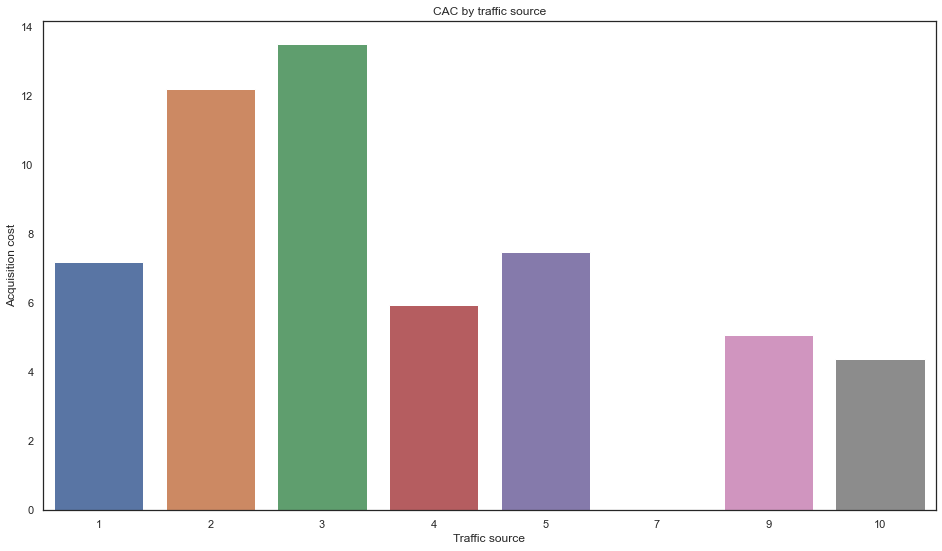

In [87]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="source_id", y="cac", data=cac)
plt.title('CAC by traffic source')
ax.set_xlabel('Traffic source')
ax.set_ylabel('Acquisition cost')
plt.show()

#2 and #3 traffic sources have the greatest Cac. #7 traffic source has no CAC.

Let's calculate and analyze CAC by months:

In [88]:
report_new_month = report_new.query('lifetime_period==0')[['month', 'n_buyers', 'costs', 'cac']]
report_new_month.head()

,month,n_buyers,costs,cac
0,2017-06-01,2023,18015.00,8.905091
12,2017-07-01,1923,18240.59,9.485486
23,2017-08-01,1370,14790.54,10.796015
33,2017-09-01,2581,24368.91,9.441654
42,2017-10-01,4340,36322.88,8.369327


In [89]:
report_new_month['cac'].mean()

9.147357292482544

and build a bar chart:

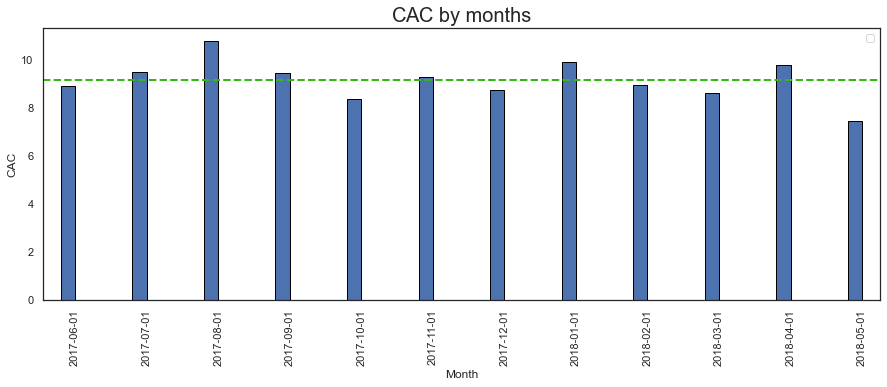

In [90]:
ax = plt.gca()
report_new_month.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, position=1, y='cac', x='month')
plt.axhline(y=report_new_month['cac'].mean(), color='#35B815', linestyle='--', lw=2)
plt.title("САС by months", fontsize = 20)
plt.xlabel('Month')
plt.ylabel('CAC')
ax.legend('')
plt.show()

Mean САС = 9. It didn't vary significantly from month to month. The highest Cac value was in August and the lowest value in May.

#### ROMI by cohorts and traffic sources

To calculate ROMI we create 'cohorts_by_source_date' table. We merge 'orders' and 'visits_source' table on user id and group the dataset by traffic source, first purchase date and user lifetime. Then we count the number of unique users and revenue amount for each group.

In [91]:
cohorts_by_source_date = (orders.merge(visits_source, on='uid', how='inner')
                         .groupby(['source_id','first_purchase_date', 'user_lifetime']).agg({'uid':'nunique', 'revenue':'sum'})
                         .reset_index()
                         .rename(columns={'uid':'customers', 'first_purchase_date':'month'}))
cohorts_by_source_date['month'] = cohorts_by_source_date['month'].dt.date

cohorts_by_source_date.head(20)

,source_id,month,user_lifetime,customers,revenue
0,1,2017-06-01,0,190,1386.03
1,1,2017-06-01,1,15,407.65
2,1,2017-06-01,2,10,386.92
3,1,2017-06-01,3,9,746.75
4,1,2017-06-01,4,12,811.20
5,1,2017-06-01,5,15,361.85
6,1,2017-06-01,6,9,517.97
7,1,2017-06-01,7,11,467.14
8,1,2017-06-01,8,8,470.57
9,1,2017-06-01,9,7,289.97


Then we create 'cac_by_source_date' table to show monthly CAC for each traffic source.

In [92]:
cohorts_by_source_date_first = cohorts_by_source_date.query('user_lifetime==0')
costs_by_source_date = costs.groupby(['source_id', 'month'])['costs'].sum().reset_index()
cac_by_source_date = cohorts_by_source_date_first.merge(costs_by_source_date, on=['source_id', 'month'], how='inner').reset_index()
cac_by_source_date['cac'] = cac_by_source_date['costs'] / cac_by_source_date['customers']
cac_by_source_date.head()

,index,source_id,month,user_lifetime,customers,revenue,costs,cac
0,0,1,2017-06-01,0,190,1386.03,1125.61,5.924263
1,1,1,2017-07-01,0,154,1145.39,1072.88,6.966753
2,2,1,2017-08-01,0,105,796.68,951.81,9.064857
3,3,1,2017-09-01,0,227,1365.34,1502.01,6.616784
4,4,1,2017-10-01,0,328,1998.13,2315.75,7.060213


In [93]:
cac_by_source_date_ten = cac_by_source_date.query('source_id==10')
cac_by_source_date_ten

,index,source_id,month,user_lifetime,customers,revenue,costs,cac
72,72,10,2017-06-01,0,95,229.35,314.22,3.307579
73,73,10,2017-07-01,0,51,176.53,329.82,6.467059
74,74,10,2017-08-01,0,30,58.76,232.57,7.752333
75,75,10,2017-09-01,0,86,192.13,460.67,5.356628
76,76,10,2017-10-01,0,206,540.34,627.24,3.044854
77,77,10,2017-11-01,0,128,591.59,792.36,6.190313
78,78,10,2017-12-01,0,85,322.23,645.86,7.598353
79,79,10,2018-01-01,0,86,275.19,614.35,7.143605
80,80,10,2018-02-01,0,123,306.68,480.88,3.909593
81,81,10,2018-03-01,0,186,638.44,526.41,2.830161


We merge 'cohorts_by_source_date' and 'cac_by_source_date' tables. In the new table you will find Revenue, CAC, marketing expenses and number of uses broken down by months. We add columns with LTV and ROMI calculations. We divide Revenue/number of customers and LTV/CAC correspondingly. 

In [94]:
cohorts_result = cohorts_by_source_date.merge(cac_by_source_date, on=['source_id', 'month'], how='left', suffixes=('', '_y'))
cohorts_result['ltv']=cohorts_result['revenue']/cohorts_result['customers']
cohorts_result['romi']=cohorts_result['ltv']/cohorts_result['cac']
#cohorts_result[(pd.to_datetime(cohorts_result['month'])=='2017-06-01' and cohorts_result['user_lifetime']==0)].head(20)
cohorts_result1 = cohorts_result[cohorts_result['source_id'] == 10]
cohorts_result1[(pd.to_datetime(cohorts_result['month'])=='2017-06-01')].head(20)

,source_id,month,user_lifetime,customers,revenue,index,user_lifetime_y,customers_y,revenue_y,costs,cac,ltv,romi
478,10,2017-06-01,0,95,229.35,72.0,0.0,95.0,229.35,314.22,3.307579,2.414211,0.729903
479,10,2017-06-01,1,2,10.63,72.0,0.0,95.0,229.35,314.22,3.307579,5.315000,1.606916
480,10,2017-06-01,2,1,0.43,72.0,0.0,95.0,229.35,314.22,3.307579,0.430000,0.130004
481,10,2017-06-01,8,1,0.85,72.0,0.0,95.0,229.35,314.22,3.307579,0.850000,0.256986


Then we create a pivot table where months and traffic sources will be rows and user_lifetime will be columns. ROMI will be values in this pivot.

In [95]:
output = cohorts_result.pivot_table(
    index=['month', 'source_id'], columns='user_lifetime', values='romi', aggfunc='mean'
)
pd.set_option('display.max_rows', 100) #
output = output.cumsum(axis=1).round(2)
output = output.fillna('')
output

user_lifetime           0     1      2      3      4       5       6       7   \
month      source_id                                                            
2017-06-01 1          1.23  5.82  12.35  26.36  37.77   41.84   51.55   58.72   
           2          0.43   2.0   2.86   5.79   7.51    8.62   10.58   13.83   
           3          0.36  0.82   1.51   3.16   3.61    4.74    5.16    5.32   
           4          0.56  0.84   1.76   4.34   8.59   18.61   26.61   28.22   
           5          0.73  4.36   7.91  14.12   16.6   18.76   28.96    34.0   
           9          0.85  2.01   5.19   6.83   7.56    8.75   10.48   11.15   
           10         0.73  2.34   2.47                                         
2017-07-01 1          1.07  3.87  17.43  24.58  27.46   31.59   33.65   36.62   
           2          0.75  2.28   2.71   3.12   3.78    4.36    5.63    5.92   
           3          0.40  0.87   1.13   1.88   2.11    2.37    2.55    2.87   
           4          0.79  1.63   2.37   3.25   3.75    4.27    4.84    5.65   
           5          0.73  2.55   5.26   6.76   7.39    8.45    8.84    9.76   
           9          0.72  1.39   2.08    2.8   3.32    3.52    4.77    5.28   
           10         0.54  0.66          1.25                                  
2017-08-01 1          0.84  1.97   5.12   7.49   9.37   11.11   13.56   19.09   
           2          0.35  1.09   1.27   1.77   2.52    2.73    2.97    3.49   
           3          0.26  0.58   1.16   1.53   1.93    2.05    2.18    2.36   
           4          0.49   1.4   1.86   2.52   2.98    3.59    4.19    5.05   
           5          0.81  3.06   7.01  10.78   18.4    27.3   31.23   32.84   
           9          0.94  2.13   3.04   3.87   4.25    4.57    5.54    6.37   
           10         0.25  2.12   2.91                                   3.2   
2017-09-01 1          0.91  5.03   6.51   9.68  10.34   10.87   11.36   16.62   
           2          0.61  6.66   8.34    9.5  12.38   13.71   17.88   20.35   
           3          0.44  0.83   1.66   2.04   3.22    3.69    4.04    4.39   
           4          0.54  1.83   3.14   4.63    4.9    6.28   14.64   16.42   
           5          0.95  1.98   4.11  89.83  98.53  113.69  116.85  121.37   
           9          0.94  2.23   4.14   7.79   9.16   10.06   12.05   18.11   
           10         0.42  0.94   1.27   2.29   2.52                    2.68   
2017-10-01 1          0.86  2.85   4.16   4.85   8.01    8.53   11.47   13.68   
           2          0.60  2.68   3.85   5.05   6.18     6.7     7.1     7.9   
           3          0.34  0.96   1.25   1.57   2.01    2.46     2.6    2.91   
           4          0.76  1.59   2.47   3.23   4.49    5.45    6.52    7.41   
           5          0.81  1.72   2.73   3.61   4.61    5.83    7.51    9.23   
           9          0.97  1.88   3.21   3.77    4.8   16.67   16.88   17.34   
           10         0.86   2.2   2.55   3.13   4.44    5.11     5.8    6.99   
2017-11-01 1          0.98   2.5   5.46    8.4   9.51   10.45   10.86           
           2          0.53  1.63   2.75   5.08   6.12    6.55    6.99           
           3          0.32  0.52   0.73   1.11   1.32     1.6    1.79           
           4          1.12  3.27   3.98   6.94   9.16   10.04   14.07           
           5          0.50  0.96   1.56   1.94   2.98    3.42    4.45           
           9          0.79  1.48    2.2    3.3   3.88     4.2    4.52           
           10         0.75  0.96   1.26    1.9   2.62    3.13    3.42           
2017-12-01 1          0.63  1.47   3.19   3.93   4.33    5.42                   
           2          0.67  2.07  20.95  42.43  50.48   59.82                   
           3          0.33  0.73    1.3   1.77   2.34    2.64                   
           4          0.73   1.3   2.06   2.89   3.85    5.05                   
           5          0.64  1.22   1.74   2.17   2.53    2.65                   
           9          0.70  1.5

Below we build a heatmap to show monthly ROMI for each cohort.

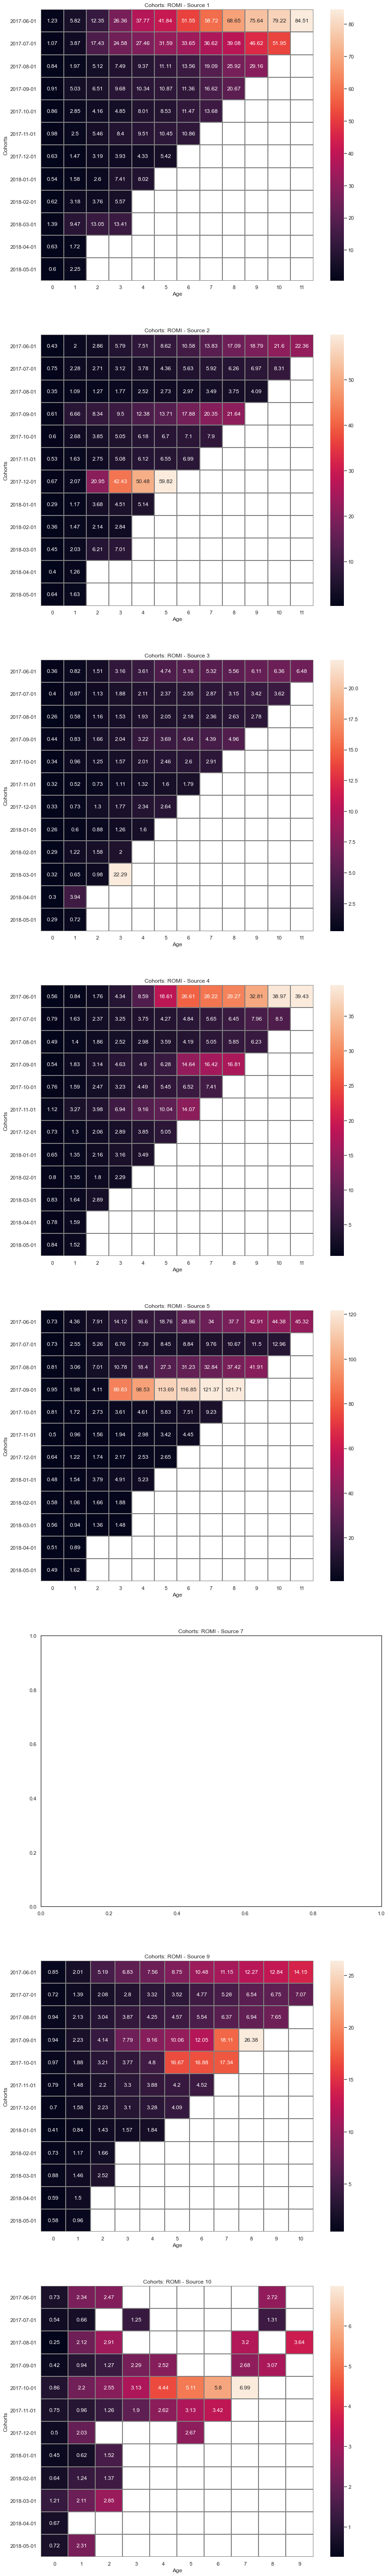

In [96]:
arr = cohorts_result['source_id'].unique()

n = len(arr)
sns.set(style='white')
fig, axes = plt.subplots(nrows=n,figsize=(13, 100))
for i in range(n):
    ax = axes[i]
    source = arr[i]
    cohorts_result_source = cohorts_result.query('source_id==@source')
    
    cohorts_result_source_pivot = (cohorts_result_source.pivot_table(
                                    index='month',
                                    columns='user_lifetime',
                                    values='romi',
                                    aggfunc='mean'))
    ax.set_title(f'Cohorts: ROMI - Source {source}')
    if not len(cohorts_result_source_pivot):
        continue
    cohorts_result_source_pivot = cohorts_result_source_pivot.cumsum(axis=1).round(2)
    sns.heatmap(cohorts_result_source_pivot, annot=True, linewidths=1, linecolor='gray', ax=ax, fmt='g'); 
    ax.set_xlabel('Age')
    ax.set_ylabel('Cohorts')
    

1 traffic source. Judging by the heatmap it took 1 month to almost recover marketing investments. However next cohorts do not demonstrate the same result. We lack information to answer why.

2 traffic source. For the 1st cohort it took 1 year to recover 22% of marketing expenses. Cohort #7 was the most successful one: 60% of the expenses were recovered. 

3 traffic source. The result leaves much to be desired: cohort#1 recovered the marketing investment only by 6.82%, the other cohorts have even worse results and only cohort #10 recovered the expenses by 22%

4 traffic source. Cohort #1 expenses paid back by 39%. The other cohorts have even worse results.

5 traffic source. Cohort #1 : ROMI=68.82, it's very good compared to other traffic sources. Cohort #4: ROMI = 122%. It took 5 months to have 100% pay back and it's the best result overall. We need to find out why other cohorts do not demonstrate the same result but again, we lack information.

7 traffic source. No invetments, no pay back.

9 traffic source. Cohort #1 ROMI=14.16. Other cohorts have comparable results except for cohort#4 with ROMI=26.41.

10 traffic source:  Some months there were no sales.
Traffic sources #1 and #5 demonstrate the best results and it makes sense to reallocate the marketing budget to these traffic sources.

## Conclusion:

We found out that in the period under consideration (June 2017 - May 2018) Yandex.Afisha had on average 907 unique users/day, 5825 users/week and 23228 users/month with peak values in October-December 2017, right before winter holidays. Average number of visits was 987 visits/day or 1 visit per user. The average duration was 1 minute (mode). Average retention rate for the 2nd month amounted to 0.065 what is not impressive at all. Evidently, people go to concerts and shows only on special occasions. If we compare cohorts, cohort #1 demonstrates the best result. We also fiund out that time to purchase is 1 minute if we use the mode as a measure of central tendency. Users don't wait to make an order. We discovered that the average number of orders per user for the 6-month period was 1 order/user the user spent 4.9 conventional units on it. As a part of our project we calculated LTV. Mean LTV for the 6 month period was 7.9 conventional units. If we consider LTV of each cohort, June and September cohorts demonstrated the best results. 329131 conventional units were spent on marketing in this period. Major part (43% and 19%) was allocated to traffic sources #3 and #4 correspondingly. If we break down marketing expenses by months we'll see that the greater part of investments was made in September, November and December to attract more Clients before winter holidays. CAC was 9 conventional units. If we consider CAC for each traffic source, we'll see it amounted to 13 and 12 c u for sources #3 and #2 correspondingly. To complete our analysis we calculated ROMI for each cohort and traffic source. We came to the conclusion it makes sense to reallocate the marketing budget to traffic sources #1 and #5 as they demonstrated the best results.